# ESERCIZIO 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML 101.1-20230219T101028Z-001 (3)/ML 101.1/data/Copia di breast-cancer-wisconsin (1).data")
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
indexNames = df[ df['Bare Nuclei'] == '?' ].index
df.drop(indexNames , inplace=True)

In [ ]:
df = df.drop('Sample code number', axis=1)
df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [ ]:
df = df.astype(int)

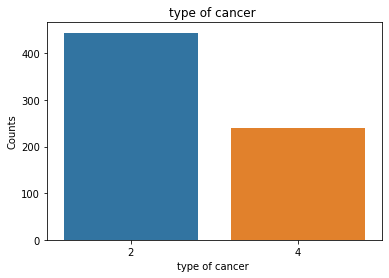

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x="Class", data=df)
plt.title("type of cancer ")
plt.xlabel("type of cancer ") #2 for benign, 4 for malignant)
plt.ylabel("Counts")
plt.show()

In [ ]:
import numpy as np
df_np = df.to_numpy()
x=df_np[:,:-1]
y=df_np[:,-1]

In [ ]:
import collections
collections.Counter(y)

Counter({2: 444, 4: 239})

In [ ]:
#suddividiamo ora i dati in due dataset, uno per 'allenare' il metodo (training set) 
# e l'altro per testarne l'efficacia (test set). Facciamo in modo che il training set sia il 70% del totale

from sklearn.model_selection import train_test_split # suddivide le osservazioni nei due insiemi

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.30, # by default is 75%-25%
                                                    # shuffle is set True by default,
                                                    stratify = y, # per mantenere le proporzioni che ci sono nei dati di partenza
                                                    random_state = 123) # fix random seed for replicability

In [ ]:
np.set_printoptions(suppress=True)
print(X_train[:10])
print(f'y_train = {y_train[:10]}')

[[ 8 10 10  8  6  9  3 10 10]
 [ 3  2  2  1  2  1  2  3  1]
 [ 1  1  1  1  2  1  3  1  1]
 [ 1  1  1  1  1  1  1  1  1]
 [ 1  1  3  2  2  1  3  1  1]
 [ 3 10  7  8  5  8  7  4  1]
 [ 5 10 10 10 10  2 10 10 10]
 [ 1  1  1  3  2  1  1  1  1]
 [ 7  8  3  7  4  5  7  8  2]
 [ 7  4  5 10  2 10  3  8  2]]
y_train = [4 2 2 2 2 4 4 2 4 4]


In [ ]:
# importiamo il metodo di classificazione K-NN
from sklearn.neighbors import KNeighborsClassifier
#inizializziamo il metodo con n_neighbors=5
neigh = KNeighborsClassifier(n_neighbors=5)
# "alleniamo" il metodo con i dati del training set
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# proviamo a fare una previsione sui dati del test set
predict = neigh.predict(X_test)

In [ ]:
print(f'dati predetti dal metodo =                {predict[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [4 2 2 4 4 2 2 4 4 2]
dati reali presenti nel dataset di test = [4 2 2 4 4 2 2 4 4 2]


Maximum accuracy:- 0.975609756097561 at K = 5


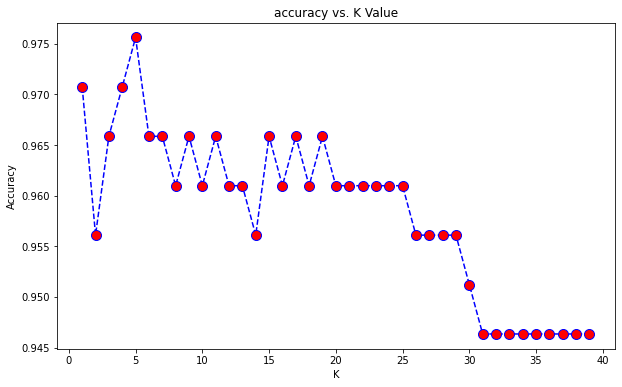

In [ ]:
acc = []
# Will take some time
from sklearn import metrics
for k in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)) + 1 )

In [ ]:
# importiamo il metodo di classificazione K-NN
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)

# "alleniamo" il metodo con i dati del training set
neigh.fit(X_train, y_train)

# proviamo a fare una previsione sui dati del test set
predict_knn = neigh.predict(X_test)

In [ ]:
print(f'dati predetti dal metodo =                {predict_knn[:10]}')
print(f'dati reali presenti nel dataset di test = {y_test[:10]}')

dati predetti dal metodo =                [4 2 2 4 4 2 2 4 4 2]
dati reali presenti nel dataset di test = [4 2 2 4 4 2 2 4 4 2]


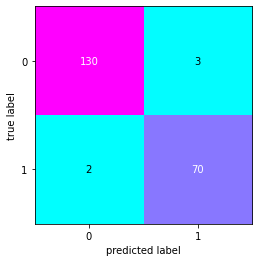

In [ ]:
# valutiamo il nostro metodo:
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
# visualizziamo la confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, predict_knn), cmap=plt.cm.cool)
plt.show()

In [ ]:
# visualizziamo adesso gli indicatori
print(classification_report(y_test, predict_knn))

              precision    recall  f1-score   support

           2       0.98      0.98      0.98       133
           4       0.96      0.97      0.97        72

    accuracy                           0.98       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.98      0.98      0.98       205



In [ ]:
daScoprire = [[10,10,10,10,5,10,10,10,7]] 
predict = neigh.predict(daScoprire)
predict

array([4])

Maximum accuracy:- 0.9219512195121952 at K = 2


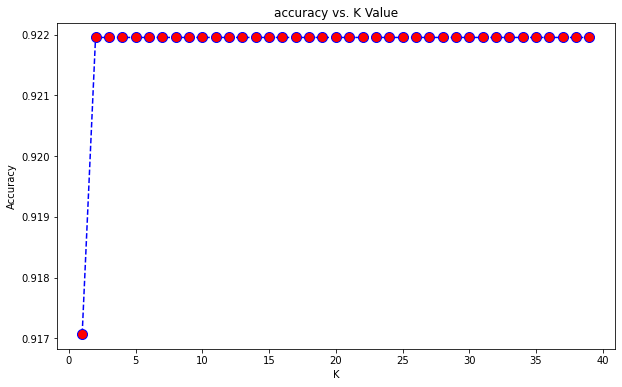

In [ ]:
from sklearn import tree
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
  tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=i, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )
  # prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
  tree_clf.fit(X_train,y_train)

  # seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
  predict_dt = tree_clf.predict(X_test)
  acc.append(metrics.accuracy_score(y_test, predict_dt))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)) + 1 )

In [ ]:
# impostiamo i parametri del metodo
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=2, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
tree_clf.fit(X_train,y_train)

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
predict_dt = tree_clf.predict(X_test)

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predict_dt[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [2 4 2 4 4 2 2 4 4 2]
dati reali presenti nel dataset di test = [4 2 2 4 4 2 2 4 4 2]


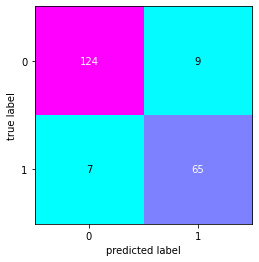

In [ ]:
#plots IMPORTS
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict_dt), cmap=plt.cm.cool)
plt.show() # DecisionTree

In [ ]:
print(classification_report(y_test, predict_dt))

              precision    recall  f1-score   support

           2       0.95      0.93      0.94       133
           4       0.88      0.90      0.89        72

    accuracy                           0.92       205
   macro avg       0.91      0.92      0.91       205
weighted avg       0.92      0.92      0.92       205



In [ ]:
daScoprire = [[10,10,10,10,5,10,10,10,7]] 
predict = neigh.predict(daScoprire)
predict

array([4])

2.7 fare un confronto tra i due metodi e dire quale è il migliore a seconda delle richieste facendo un confronto tra le due confusion matrix e i classification report

il migliore è il k nn sia per capire i cancri maligni e quelli "buoni"

2.8 i dati dell'esercizio 2.4 sono presenti nel dataset. Controllare a quale classe appartengono e verificare se i metodi hanno classificato correttamente. I dati appartenevano al training set o al test set?

In [ ]:
df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [ ]:
df[(df["Clump Thickness"] == 10) & (df["Uniformity of Cell Size"] == 10) & (df["Uniformity of Cell Shape"] == 10) & (df["Marginal Adhesion"] == 10) & (df["Single Epithelial Cell Size"] == 5) & (df["Bare Nuclei"] == 10) & (df["Bland Chromatin"] == 10) & (df["Normal Nucleoli"] == 10) & (df["Mitoses"] == 7) ]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
680,10,10,10,10,5,10,10,10,7,4


li classifica giustamente entrambi

#ESERCIZIO 2

## Pulizia Dati

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML 101.1-20230219T101028Z-001 (3)/ML 101.1/data/glass (1).data", names = ["ID", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "class"])
df

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
df = df.drop(["ID"], axis = 1)
df = df.astype(float)
df

## KNN

In [ ]:
import numpy as np
dfnp = df.to_numpy()
x=dfnp[:,:-1] #variabili indipendenti
y=dfnp[:,-1] #variabile dipendente

#Print class frequencies through collections counter
import collections
collections.Counter(y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.30, # by default is 75%-25%
                                                    # shuffle is set True by default,
                                                    stratify = y, # per mantenere le proporzioni che ci sono nei dati di partenza
                                                    random_state = 123) # fix random seed for replicability

print(X_train[:10])
print(f'y_train = {y_train[:10]}')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

#modo per individuare la miglior K
acc = []
from sklearn import metrics
for k in range(1,50):
  neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
  predict = neigh.predict(X_test)
  acc.append(metrics.accuracy_score(y_test, predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Miglior Valore K')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy: ",max(acc),"at K =",acc.index(max(acc)) + 1 )

In [ ]:
# inizializziamo il metodo con il valore 3, poiché è risultato essere il migliore
neigh = KNeighborsClassifier(n_neighbors=3)

# "alleniamo" il metodo con i dati del training set
neigh.fit(X_train, y_train)

# proviamo a fare una previsione sui dati del test set
predict = neigh.predict(X_test)

# e visualizziamo il risultato (solo i primi dieci vini)
print(f'dati predetti dal metodo =                {predict[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

In [ ]:
# visualizziamo la confusion matrix

plot_confusion_matrix(confusion_matrix(y_test, predict), cmap = plt.cm.Dark2)
plt.show()

In [ ]:
# visualizziamo adesso gli indicatori
print(classification_report(y_test, predict))

2.4 utilizzare il metodo per ipotizzare la classe di appartenenze dell'oggetto che ha queste caratteristiche:

In [ ]:
from tabulate import tabulate

info = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
daScoprire = [1.51115, 17.38, 0.00, 0.34, 75.41, 0.00, 6.65, 0.00, 0.00] 
print(tabulate([daScoprire], headers=info))

In [ ]:
daScoprire = [[1.51115, 17.38, 0.00, 0.34, 75.41, 0.00, 6.65, 0.00, 0.00]]
predictdaScoprire = neigh.predict(daScoprire)
predictdaScoprire

## Decision Tree

2.5 provare a utilizzare l'algoritmo decision tree con diversi valori dei parametri del metodo per classificare i dati. Inserire nel notebook le varie prove effettuate spiegando quali sono i valori dei parametri che meglio descrivono il fenomeno e perché

### Prova 1

In [ ]:
from sklearn import tree

# impostiamo i parametri del metodo
tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=4, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
tree_clf.fit(X_train,y_train)

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
predict_dt1 = tree_clf.predict(X_test)

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predict_dt1[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

In [ ]:
#plots IMPORTS
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict_dt1), cmap = plt.cm.Dark2)
plt.show()

In [ ]:
print(classification_report(y_test, predict_dt1))

### Prova 2

In [ ]:
from sklearn import tree

# impostiamo i parametri del metodo
tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=6, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=8, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
tree_clf.fit(X_train,y_train)

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
predict_dt2 = tree_clf.predict(X_test)

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predict_dt2[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

In [ ]:
#plots IMPORTS
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict_dt2), cmap = plt.cm.Dark2)
plt.show()

In [ ]:
print(classification_report(y_test, predict_dt2))

### Prova 3

In [ ]:
from sklearn import tree

# impostiamo i parametri del metodo
tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=8, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=28, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=10, # numero dei nodi foglia
                                       min_samples_leaf=5 # numero di campioni per essere una foglia
                                      )

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
tree_clf.fit(X_train,y_train)

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
predict_dt3 = tree_clf.predict(X_test)

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predict_dt3[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

In [ ]:
#plots IMPORTS
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict_dt3), cmap = plt.cm.Dark2)
plt.show()

In [ ]:
print(classification_report(y_test, predict_dt3))

In [ ]:
#save the feature list into a vector (sono i nomi delle colonne del dataset)
features=list(df.columns.values)

import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                     feature_names=features[:-1],  
                     class_names=['0', '1', '2', '3', '4', '5'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render('Glass')
graph

Basandomi sull'accuracy generale tra queste tre prove, posso affermare che i valori migliori dei parametri del metodo sono quelli usati nella Prova 2

### 2.6 utilizzare il metodo per ipotizzare la classe di appartenenza dell'oggetto dell'esercizio 2.4

In [ ]:
daScoprire = [[1.51115, 17.38, 0.00, 0.34, 75.41, 0.00, 6.65, 0.00, 0.00]]
predictdaScoprire = tree_clf.predict(daScoprire)
predictdaScoprire

## Confronto

2.7 fare un confronto tra i due metodi e dire quale è il migliore a seconda delle richieste mettendo a confronto  le due confusion matrix e i due classification  report

In [ ]:
plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Dark2) #KNN
plot_confusion_matrix(confusion_matrix(y_test, predict_dt2)) #Decision Tree

plt.show()

In [ ]:
print(classification_report(y_test, predict))

print(classification_report(y_test, predict_dt2))

Basandomi sulle due classification report, posso affermare che, in questo caso, il metodo KNN è migliore del metodo decision tree per l'individuazione di tutte le classi tranne la "5.0" e la "3.0", in quanto sono le uniche classi dove l'f1-score del decision tree è più alto

## 2.8 

i dati dell'esercizio 2.4 sono presenti nel dataset. Controllare a quale classe appartengono e verificare se i metodi hanno classificato correttamente. I dati appartenevano al training set o al test set?

In [ ]:
df[(df["RI"] == 1.51115) & (df["Na"] == 17.38) & (df["Mg"] == 0.00) & (df["Al"] == 0.34) & (df["Si"] == 75.41) & (df["K"] == 0.00) & (df["Ca"] == 6.65) & (df["Ba"] == 0.00) & (df["Fe"] == 0.00)]

I dati dell'esercizio 2.4 appartengono alla classe 6.0

# ESERCIZIO 3

## Pulizia Dati

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML 101.1-20230219T101028Z-001 (3)/ML 101.1/data/Copia di accent-mfcc-data-1.csv")
df

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,US,-0.525273,-3.868338,3.548304,1.496249,3.490753,5.849887,-7.747027,9.738836,-11.754543,7.129909,0.209947,-1.946914
325,US,-2.094001,-1.073113,1.217397,-0.550790,2.666547,7.449942,-6.418064,10.907098,-11.134323,6.728373,2.461446,-0.026113
326,US,2.116909,-4.441482,5.350392,3.675396,2.715876,3.682670,-4.500850,11.798565,-12.031005,7.566142,-0.606010,-2.245129
327,US,0.299616,0.324844,3.299919,2.044040,3.634828,6.693840,-5.676224,12.000518,-11.912901,4.664406,1.197789,-2.230275


In [ ]:
#2.2

df['language'] = df['language'].replace('ES',0)
df['language'] = df['language'].replace('FR',1)
df['language'] = df['language'].replace('GE',2)
df['language'] = df['language'].replace('IT',3)
df['language'] = df['language'].replace('UK',4)
df['language'] = df['language'].replace('US',5)
df

In [ ]:
import numpy as np
dfnp = df.to_numpy()
x=dfnp[:,1:] 
y=dfnp[:,0] 

import collections
collections.Counter(y)

In [ ]:

!pip install sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.30,
                                                    stratify = y, 
                                                    random_state = 123) 

## KNN

In [ ]:
#2.3

accuracy = []
from sklearn import metrics
for k in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('K Ottimale')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(accuracy),"at K =",accuracy.index(max(accuracy)) + 1 )

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neigh = KNeighborsClassifier(n_neighbors=6)
neigh.fit(X_train, y_train) 

predict = neigh.predict(X_test) 


print(f'dati predetti dal metodo =                {predict[:10]}') 
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') 

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Dark2)
plt.show()

In [ ]:
#2.4

Prova = [[1.58748169850998,0.00546117248979446,-1.37370216119175,2.16798060689537,-11.6280417992599,11.4742541860579,-7.9980890019126,5.75985089368138,-0.733238227803793,-3.07585758755774,3.09265899141867,-1.52261836853813]]
predictProvaKNN = neigh.predict(Prova)
predictProvaKNN

## Decision Tree

In [ ]:
#2.5

from sklearn import tree


tree_clf = tree.DecisionTreeClassifier(criterion="gini",
                                       max_depth=4, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )


tree_clf.fit(X_train,y_train)


predict = tree_clf.predict(X_test)


print(f'dati predetti dal metodo =                {predict[:10]}')
print(f'dati reali presenti nel dataset di test = {y_test[:10]}')

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict))
plt.show()

In [ ]:
features=list(df.columns.values)
print(features)
print(features[1:13])
import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                     feature_names=features[1:13],
                     class_names=['0','1','2','3','4','5'],
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render('Money')
graph

In [ ]:
from sklearn.tree import export_text
r = export_text(tree_clf, feature_names=features[1:13])
print(r)

In [ ]:
#2.6

predictProvaDecisionTree = tree_clf.predict(Prova)
predictProvaDecisionTree

## Confronto tra i 2 metodi

2.7

Confusion Matrix KNN

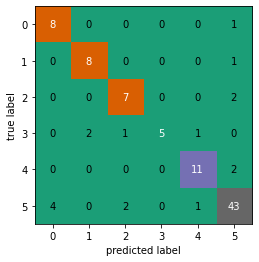


Confusion Matrix Decision Tree

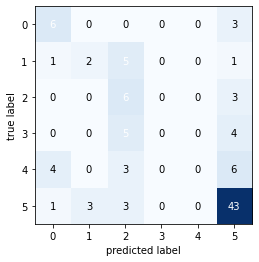

Mettendo a confronto le 2 confusion matrix possiamo dire che il metodo Decision Tree è molto accurato a trovare la classe 5 ma pecca per le altre classi invece il metodo KNN è molto accurato a trovare la classe 5 ed è abbastanza accurato a trovare le altre classi

In [ ]:
#Classification Report KNN
print(classification_report(y_test, predict))

In [ ]:
#Classification Report Decision Tree
print(classification_report(y_test, predict))

In [ ]:
#2.8
df[df['X1']==1.58748169850998 ]

#Apparteneva alla classe 3(IT) e i 2 metodi non hanno classificato correttamente

# Random Forest